# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

632

In [7]:
cities

['qaanaaq',
 'angoram',
 'dasoguz',
 'chokurdakh',
 'busselton',
 'ushuaia',
 'cabedelo',
 'albany',
 'faanui',
 'ancud',
 'karlivka',
 'carnarvon',
 'uvat',
 'honningsvag',
 'vaini',
 'stornoway',
 'coquimbo',
 'amderma',
 'barrow',
 'talnakh',
 'dikson',
 'cape town',
 'kaoma',
 'samusu',
 'kaohsiung',
 'iqaluit',
 'kapaa',
 'saint-philippe',
 'bluff',
 'hilo',
 'kaka',
 'parana',
 'nemuro',
 'punta arenas',
 'surt',
 'atuona',
 'bengkulu',
 'port lincoln',
 'russell',
 'batemans bay',
 'namatanai',
 'barentsburg',
 'mayumba',
 'leningradskiy',
 'sabha',
 'kodiak',
 'mar del plata',
 'manokwari',
 'longyearbyen',
 'bhatkal',
 'hithadhoo',
 'puerto ayora',
 'el faiyum',
 'port hardy',
 'norman wells',
 'geraldton',
 'sao joao da barra',
 'kafanchan',
 'halalo',
 'belushya guba',
 'hobart',
 'rikitea',
 'namibe',
 'jumla',
 'paulo afonso',
 'millinocket',
 'rio gallegos',
 'san jose',
 'saskylakh',
 'pallasovka',
 'isangel',
 'port alfred',
 'constitucion',
 'saint anthony',
 'golden',

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#Loop through the list of cities and perform a request for data on each
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

#define lists
city_name = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

print('Beginning Data Retrieval')
print('-----------------------------')

for city in cities:
  
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_name.append(city)
        print(f'Processing Record {len(city_name)} | {city}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')


Beginning Data Retrieval
-----------------------------
Processing Record 1 | qaanaaq
Processing Record 2 | angoram
Processing Record 3 | dasoguz
Processing Record 4 | chokurdakh
Processing Record 5 | busselton
Processing Record 6 | ushuaia
Processing Record 7 | cabedelo
Processing Record 8 | albany
Processing Record 9 | faanui
Processing Record 10 | ancud
Processing Record 11 | karlivka
Processing Record 12 | carnarvon
Processing Record 13 | uvat
Processing Record 14 | honningsvag
Processing Record 15 | vaini
Processing Record 16 | stornoway
Processing Record 17 | coquimbo
City not found. Skipping...
Processing Record 18 | barrow
Processing Record 19 | talnakh
Processing Record 20 | dikson
Processing Record 21 | cape town
Processing Record 22 | kaoma
City not found. Skipping...
Processing Record 23 | kaohsiung
Processing Record 24 | iqaluit
Processing Record 25 | kapaa
Processing Record 26 | saint-philippe
Processing Record 27 | bluff
Processing Record 28 | hilo
Processing Record 29 | 

Processing Record 232 | lusaka
Processing Record 233 | laguna
Processing Record 234 | grocka
Processing Record 235 | ritchie
Processing Record 236 | aklavik
Processing Record 237 | xingyi
Processing Record 238 | vila velha
Processing Record 239 | puerto lempira
Processing Record 240 | katsuura
City not found. Skipping...
Processing Record 241 | belyy yar
City not found. Skipping...
Processing Record 242 | narbonne
Processing Record 243 | luanda
City not found. Skipping...
Processing Record 244 | port arthur
Processing Record 245 | limulunga
Processing Record 246 | flinders
Processing Record 247 | alto parana
Processing Record 248 | lyuban
Processing Record 249 | cururupu
City not found. Skipping...
Processing Record 250 | sambava
Processing Record 251 | pueblo nuevo
Processing Record 252 | kijang
Processing Record 253 | saint-pierre
Processing Record 254 | polyarnyy
Processing Record 255 | kyabe
Processing Record 256 | torbay
Processing Record 257 | bonthe
Processing Record 258 | oranj

Processing Record 462 | otuzco
Processing Record 463 | dukat
Processing Record 464 | santa vitoria do palmar
Processing Record 465 | labuhan
Processing Record 466 | boyolangu
Processing Record 467 | camabatela
Processing Record 468 | agaro
Processing Record 469 | gorin
Processing Record 470 | kawalu
Processing Record 471 | hasaki
Processing Record 472 | tura
Processing Record 473 | kaeo
Processing Record 474 | terrace bay
Processing Record 475 | kovernino
Processing Record 476 | mantua
City not found. Skipping...
Processing Record 477 | mangrol
Processing Record 478 | mount isa
Processing Record 479 | tual
Processing Record 480 | cairns
Processing Record 481 | tottori
City not found. Skipping...
Processing Record 482 | koslan
Processing Record 483 | aykhal
City not found. Skipping...
Processing Record 484 | bathsheba
Processing Record 485 | opuwo
Processing Record 486 | avon
Processing Record 487 | olovyannaya
Processing Record 488 | hornepayne
Processing Record 489 | sillod
Processing

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [10]:
#Create a dataframe
weather_dict = {"City": city_name, "Lat": lat, "Lng": lng,
                "Max Temp": max_temp, "Humidity": humidity, 
                "Cloudiness" : cloudiness, "Wind Speed": wind_speed,
                "Country": country, "Date": date}
weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,31.57,84,96,12.08,GL,1619636371
1,angoram,-4.0625,144.0661,72.73,97,100,2.13,PG,1619636372
2,dasoguz,41.8363,59.9666,77.00,29,0,4.61,TM,1619636372
3,chokurdakh,70.6333,147.9167,1.20,95,82,7.11,RU,1619636373
4,busselton,-33.6500,115.3333,61.00,97,100,3.89,AU,1619636373


In [11]:
# Export the weather_data dataframe to csv
weather_data.to_csv("../weather_data.csv", encoding="utf-8", index=False)


In [13]:
# Read it back in to run plots below — when reopening the file — with out having to rerun the API call above
weather_data = pd.read_csv("../weather_data.csv")
weather_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,qaanaaq,77.4840,-69.3632,31.57,84,96,12.08,GL,1619636371
1,angoram,-4.0625,144.0661,72.73,97,100,2.13,PG,1619636372
2,dasoguz,41.8363,59.9666,77.00,29,0,4.61,TM,1619636372
3,chokurdakh,70.6333,147.9167,1.20,95,82,7.11,RU,1619636373
4,busselton,-33.6500,115.3333,61.00,97,100,3.89,AU,1619636373


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# No cities higher than 100% humidity
weather_data.sort_values(by='Humidity', ascending=False).head(5)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
108,gat,31.6100,34.7642,69.01,100,0,6.98,IL,1619636284
9,ancud,-41.8697,-73.8203,55.00,100,90,3.44,CL,1619636377
78,hambantota,6.1241,81.1185,77.00,100,75,3.44,LK,1619636422
395,launceston,-41.4500,147.1667,45.00,100,67,3.44,AU,1619636410
387,alyangula,-13.8483,136.4192,73.40,100,70,9.69,AU,1619636600


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

Text(0, 0.5, 'Max Temperature (F)')

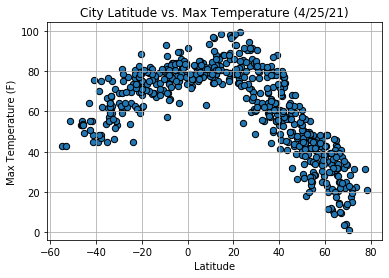

In [15]:
weather_data.plot.scatter(x='Lat', y='Max Temp', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Max Temperature (4/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

## Latitude vs. Humidity Plot

Text(0, 0.5, 'Humidity (%)')

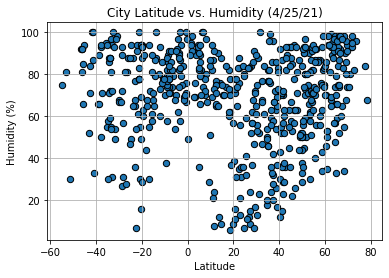

In [16]:
weather_data.plot.scatter(x='Lat', y='Humidity', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Humidity (4/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

## Latitude vs. Cloudiness Plot

Text(0, 0.5, 'Cloudiness (%)')

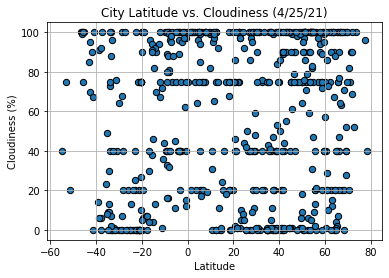

In [43]:
weather_data.plot.scatter(x='Lat', y='Cloudiness', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Cloudiness (4/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

## Latitude vs. Wind Speed Plot

Text(0, 0.5, 'Wind Speed (mph)')

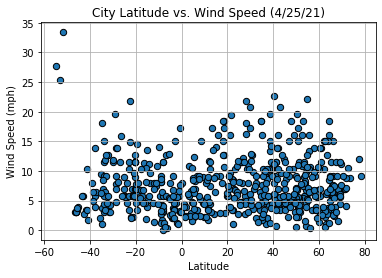

In [18]:
weather_data.plot.scatter(x='Lat', y='Wind Speed', s=40, facecolor='c', edgecolor='k', grid=True)
plt.title("City Latitude vs. Wind Speed (4/25/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7538086060812731


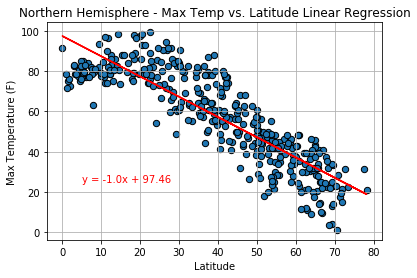

In [19]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
temp_list = north_hemi_df['Max Temp']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, temp_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(5,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5721392778373574


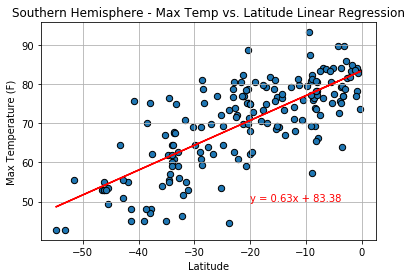

In [27]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
temp_list = south_hemi_df['Max Temp']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, temp_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Max Temp', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(-20,50), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.024930011775603625


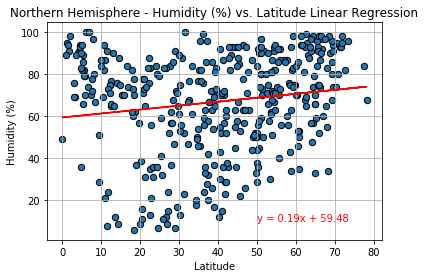

In [29]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
humid_list = north_hemi_df['Humidity']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, humid_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(50,10), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.007234284562561066


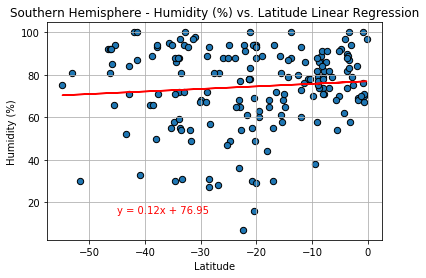

In [31]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
humid_list = south_hemi_df['Humidity']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, humid_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Humidity', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(-45,15), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 2.6141696587041307e-05


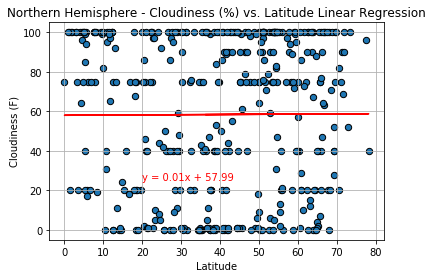

In [33]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
cloud_list = north_hemi_df['Cloudiness']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, cloud_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(20,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.028617339598476035


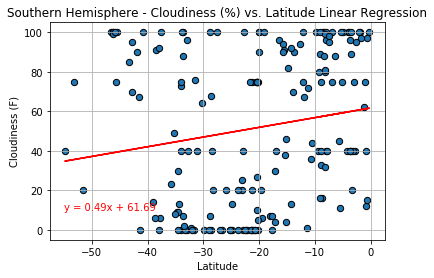

In [36]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
cloud_list = south_hemi_df['Cloudiness']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, cloud_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Cloudiness', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (F)")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(-55,10), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 4.325804973565943e-05


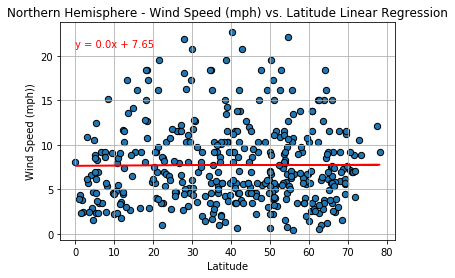

In [40]:
#Get the northern hemisphere data only
north_hemi_df = weather_data.loc[weather_data['Lat'] >= 0]

#create variables for measurements
lat_list = north_hemi_df['Lat']
wind_list = north_hemi_df['Wind Speed']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, wind_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
north_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(0,21), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.05771510861253704


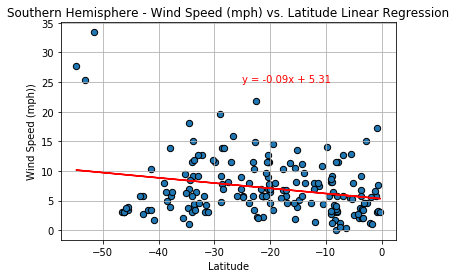

In [42]:
#Get the southern hemisphere data only
south_hemi_df = weather_data.loc[weather_data['Lat'] < 0]

#create variables for measurements
lat_list = south_hemi_df['Lat']
wind_list = south_hemi_df['Wind Speed']

#calculate linear regression values
(slope, intercept, rvalue, pvalue, stderr) = linregress(lat_list, wind_list)
regress_values = lat_list * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Plot the data
south_hemi_df.plot.scatter(x='Lat', y='Wind Speed', s=40, facecolor='c', edgecolor='k', grid=True)

plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph))")

#Plot the linear regression
plt.plot(lat_list, regress_values, "r-")
plt.annotate(line_eq,(-25,25), color='red')
print(f"The r-value is: {rvalue**2}")

plt.show()

# Analysis

Three observable trends I see based on the data are:

* The Max Temp vs Latitude scatter plot shows an arc of data that looks like it corresponds to the max temperatures as you move away from the equator. The graph only shows -60 to 80 so the data looks skewed towards the northern hemisphere but if played out seems like it would follow the same arc on both sides of the equator.

* There is a strong correlation between the Max Temp vs. Latitude in the northern hemisphere, but only a moderate correlation in the southern hemisphere. 

* Wind Speed, Cloudiness, and Humidity did not have a correlation to Latitude in either hemisphers.

* The northern hemisphere has more data plots. This may be due to more cities (i.e. more people) that are living north of the equator, but without further analysis it's speculative.